<a href="https://colab.research.google.com/github/derekbomfimprates/GiniGain/blob/main/DecisionTreeUsingGiniGain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Tasks: Gini Gain and Decision tree**


**Name**:
1. Derek Bomfim Prates


**Module/Subject Title**: Machine Learning and Pattern Recognition

**Assignment Title:** Machine Learning Tasks – (Individual Task)

1. Using the following dataset, create a decision tree using the Gini gain. Suppose the following dataset is about the properties of 10 people where the attribute “Covid” shows whether a person is contaminated or not. The attribute “Covid” is the dependent attribute with two values (Covid = 'Yes', Covid = 'No'). Each person has 4 features, and you want tocreate a decision tree based on which one can predict if the new record or person is having covid or not.


*   Which one of these features is themost important feature?

*   What isthe best Gini Gain (GG) of a feature?



# Import Packages and libraries

To simplify and ensure easy access to all imports, this section will be dedicated to importing all necessary packages at the beginning of the project.

In [ ]:
import matplotlib.pyplot as plt                              # For plotting data
import seaborn as sns                                        # For plotting data
import pandas as pd                                          # For dataframes
import numpy as np                                           # For arrays and math
from sklearn.model_selection import GridSearchCV             # For parameter optimization
from sklearn.tree import DecisionTreeClassifier, plot_tree   # For decision trees
from sklearn import tree                                     # For Decision trees
from sklearn.preprocessing import LabelEncoder               # For Encoding Label (object to int)
from sklearn.model_selection import train_test_split         # For split the data
from sklearn.metrics import confusion_matrix, classification_report # For create and printconfusion report for confusion Matrix
from sklearn.tree import export_graphviz                     # For decision trees
import graphviz                                              # For decision trees

In [ ]:
# Loading the datasetusing pandas
df= pd.read_csv('/content/covid.csv')
# printing dataset
df

,temperature,Cough,Lost Taste,Lost Smell,Covid
0,High,Yes,NaN,No,No
1,High,Yes,Yes,Yes,Yes
2,Average,Yes,No,No,No
3,Low,No,No,No,No
4,high,No,Yes,Yes,Yes
5,Average,Yes,Yes,Yes,Yes
6,Low,Yes,No,No,No
7,High,Yes,Yes,No,Yes
8,Average,No,NaN,Yes,Yes
9,Low,No,NaN,No,No


# Data Preparation

In [ ]:
# checking the values in each feature
for item in df:
  print(df[item].value_counts())

High       3
Average    3
Low        3
high       1
Name: temperature , dtype: int64
Yes    6
No     4
Name: Cough, dtype: int64
Yes     3
No      3
Yes     1
Name: Lost Taste, dtype: int64
No     6
Yes    4
Name: Lost Smell, dtype: int64
No     5
Yes    5
Name: Covid, dtype: int64


In [ ]:
# All features were standardized with the first letter capitalized

df.rename(columns={'temperature ': 'Temperature', 'Lost Smell': 'Lost_Smell', 'Lost Taste': 'Lost_Taste'}, inplace=True)

In [ ]:
# Removing extra spaces
df.replace(to_replace={'Yes ': 'Yes', 'high':'High'}, inplace=True)


In [ ]:
# Checking type and values in each feature
for item in df:
  print(df[item].value_counts())

High       4
Average    3
Low        3
Name: Temperature, dtype: int64
Yes    6
No     4
Name: Cough, dtype: int64
Yes    4
No     3
Name: Lost_Taste, dtype: int64
No     6
Yes    4
Name: Lost_Smell, dtype: int64
No     5
Yes    5
Name: Covid, dtype: int64


In [ ]:
# printing the updated dataset
df

,Temperature,Cough,Lost_Taste,Lost_Smell,Covid
0,High,Yes,NaN,No,No
1,High,Yes,Yes,Yes,Yes
2,Average,Yes,No,No,No
3,Low,No,No,No,No
4,High,No,Yes,Yes,Yes
5,Average,Yes,Yes,Yes,Yes
6,Low,Yes,No,No,No
7,High,Yes,Yes,No,Yes
8,Average,No,NaN,Yes,Yes
9,Low,No,NaN,No,No


In [ ]:
le = LabelEncoder()

In [ ]:
# Define custom encoding mapping
custom_encoding = {
    'High': 2,
    'Average': 1,
    'Low': 0
}

df['Temperature'] = df['Temperature'].map(custom_encoding)

In [ ]:
# Encoding all features
for col in df.columns:
  df[col] = le.fit_transform(df[col])


In [ ]:
# Printing the Updated dataset
df

,Temperature,Cough,Lost_Taste,Lost_Smell,Covid
0,2,1,2,0,0
1,2,1,1,1,1
2,1,1,0,0,0
3,0,0,0,0,0
4,2,0,1,1,1
5,1,1,1,1,1
6,0,1,0,0,0
7,2,1,1,0,1
8,1,0,2,1,1
9,0,0,2,0,0


For that first, we will find the Gini index of class variable and after that the average weighted Gini impurity of Temperature, Cough, Lost_Test, lost_smell


In [ ]:
# Split the dataset in dependent ('Covid') and independent variables
# ("Temperature", "Cough, "Lost_Test", "lost_smell")
X = df.drop(columns='Covid', axis=1)
y = df['Covid']
total_rows= df.shape[1]

# Calculate the Gini index of the class variable

 There are 5 instances of 'Yes' and 5 of 'No' in COVID.

In [ ]:
# Class variabel is Covid (binary class= Yes or No) and the gini index will be calculated on the variable gini_i
def calculeGiniClassVariable(df,X):
  P_c1 = df['Covid'].value_counts().get(1, 0)/df['Covid'].count()
  P_c2 = df['Covid'].value_counts().get(0, 0)/df['Covid'].count()
  gini_class=(1-np.power(P_c1,2)-np.power(P_c2,2))
  return gini_class


# Calculate the Gini Gain of all independet variables

Formula for The Gini Impurity is:
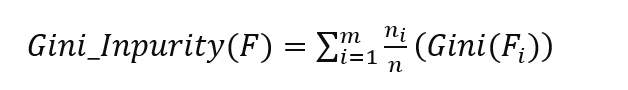

In [ ]:
#Function to calculate the Gini Impurity for each feature

def calculateGiniImpurity(df,X):

  temp = {}
  filter_total = {}
  gini = {}
  gini_feature=[0,0,0,0]
  j=0
  g=0
  print(" First, calculate the average weighted Gini impurity for each feature: ")
  print(end='\n')
  for feature in X:
    i=0
    for itens in df[feature].unique():
      temp[j]= df[feature].value_counts().get(i, 0)/df[feature].count()
      filter_no = df[(df[feature] == itens) & (df['Covid'] == 0)].value_counts(feature).sum()
      filter_yes = df[(df[feature] == itens) & (df['Covid'] == 1)].value_counts(feature).sum()
      filter_total[j]=filter_no + filter_yes
      gini[j]=(1-(np.power(filter_no/filter_total[j],2))-np.power(filter_yes/filter_total[j],2))
      gini_feature[g]= (filter_total[j]/df[feature].count())*gini[j] + gini_feature[g]

      j+=1
      i+=1
    print(f" - The average weighted Gini impurity of {feature} = {gini_feature[g]}")
    g+=1
  print(end='\n')
  return gini_feature

In [ ]:
# Fuction to calculate the Gini Gain for each feature
def calculateGiniGain(df,X,n):

  gini_class = calculeGiniClassVariable(df,X)
  gini_gain=[0]*4
  gini_feature = calculateGiniImpurity(df,X)
  print(" Second, calculate the Gini index of Class variable: ")
  print(end='\n')
  print(f" - Gini index of Class variable {y.name} = {gini_class}")
  print(end='\n')
  print(" The last step is to calculate the Gini gain for each feature using the information about the Gini index of the class variable,")
  print(" and subtracting the Gini impurity:")
  print(end='\n')
  gini_gain= gini_class-gini_feature

  t=0
  for feature in X:
    print(f" - Gini gain of {feature} = {gini_gain[t]}")
    t+=1
  print(end='\n')
  max_value = np.max(gini_gain)
  max_index = np.argmax(gini_gain).astype(int)
  columnBiggerGGain= X.columns[max_index]
  print(f" The higher Gine Gain is found on feature {columnBiggerGGain}. It is selected as root number {n}")
  print(end='\n')
# Here the stopping point will be defined. So, 3 conditions could cause the code to stop.
# First, a minimum value of impurity in a node (found in class Node).
# Second, the amount of samples in a node is less thna 10 % of the total rows od the dataset inicial.
# Lastly, if the class feature has only one type of value (in this case, either only No (0) or Yes (1)).
  perc= df.shape[1]
  unique_value=len(df['Covid'].unique())
  if (gini_class < 0.1 or perc < total_rows*0.10 or unique_value==1 ) :
    n+=1
    return print(" We do not need to keep creating roots as Gini Index of the class is less them 0.1 and all results belong to one decision")

# Recursive step
  else:
    print(" We need to create another root.")
    print(end='\n')
    print(f" Updated table: ")
    print(end='\n')
    n+=1
    filter = df[columnBiggerGGain] != 1
    df=df[filter]
    X=X[filter]
    df=df.drop(columns=columnBiggerGGain, axis=1)
    X=X.drop(columns=columnBiggerGGain, axis=1)




    print(df)
    print(end='\n')

    return calculateGiniGain(df,X,n)


In [ ]:
# n is defined to represent the first node that will be increased
n = 1
# Call hte fucntion to calculate the Ggini Gain
calculateGiniGain(df,X, n)

 First, calculate the average weighted Gini impurity for each feature: 

 - The average weighted Gini impurity of Temperature = 0.2833333333333333
 - The average weighted Gini impurity of Cough = 0.5
 - The average weighted Gini impurity of Lost_Taste = 0.13333333333333333
 - The average weighted Gini impurity of Lost_Smell = 0.1666666666666666

 Second, calculate the Gini index of Class variable: 

 - Gini index of Class variable Covid = 0.5

 The last step is to calculate the Gini gain for each feature using the information about the Gini index of the class variable,
 and subtracting the Gini impurity:

 - Gini gain of Temperature = 0.21666666666666667
 - Gini gain of Cough = 0.0
 - Gini gain of Lost_Taste = 0.3666666666666667
 - Gini gain of Lost_Smell = 0.33333333333333337

 The higher Gine Gain is found on feature Lost_Taste. It is selected as root number 1

 We need to create another root.

 Updated table: 

   Temperature  Cough  Lost_Smell  Covid
0            2      1          

# Modelling Decision Tree from sklearn.tree

As a comparison, in this section, the decision tree will be created using two approaches:

1. Using default parameters.
2. Using hyperparameters.

In [ ]:
min_impurity = 0.05

In [ ]:
spam = ['Not Covid','Covid']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:
def DecTree(X_train, X_test, y_train, y_test):

  clf= DecisionTreeClassifier(criterion='gini', random_state=42)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  # Creating the confusion Matrix using the test and predric data
  confusion_LR = confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(20,10))
  tree.plot_tree(clf,
                 feature_names=X.columns,
                 class_names=spam,
                 max_depth=4,
                 filled=True)
  plt.show()

  dot_data = export_graphviz(clf,
                             feature_names=X.columns,
                             class_names=spam,
                             max_depth=4,
                             filled=True)
  graph = graphviz.Source(dot_data)
  graph.render("decision_tree")



In [ ]:
def DecTreeHyp(X_train, X_test, y_train, y_test):
  # Define the grid of hyperparameters to search

  param_grid = {
      'criterion': ['gini','entropy'],
      'max_leaf_nodes':[1, 2,3,4,5, 10, 20, 50],
  }

  grid =  GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid)
  clf = grid.fit(X_train, y_train)

  # Fitting the model using .fit()
  grid.fit(X_train, y_train)

  # Printing the best parameters and score
  print("The best parameters are: ", grid.best_params_)
  print("The best score associeted with the best parameters are: ", grid.best_score_)

  # Selecting the best model
  best_model = grid.best_estimator_

  # Predicting using the best model
  y_pred = best_model.predict(X_test)

  # Creating the confusion Matrix using the test and predric data
  confusion_LR = confusion_matrix(y_test, y_pred)

  # Predict probabilities
  y_probs = best_model.predict_proba(X_test)


  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))

    # Plots the mean accuracy against max_leaf_nodes
  sns.relplot(
      data=pd.DataFrame.from_dict(grid.cv_results_, orient='columns'),
      kind='line',
      x='param_max_leaf_nodes',
      y='mean_test_score',
      hue='param_criterion'
  )

  # Draws a vertical red line, where the best model is
  plt.axvline(
      x=best_model.max_leaf_nodes,
      color='red',
      ls='--')

  # Sets the figure size
  fig = plt.figure()

  # Creates a visual display of the model.
  # Keep max_depth small for better visualization
  t = plot_tree(
      best_model,
      feature_names=X.columns,
      class_names=spam,
      max_depth=4,
      filled=True)

  print("Training accuracy:", clf.score(X_train, y_train))
  print("Test accuracy:", clf.score(X_test, y_test))

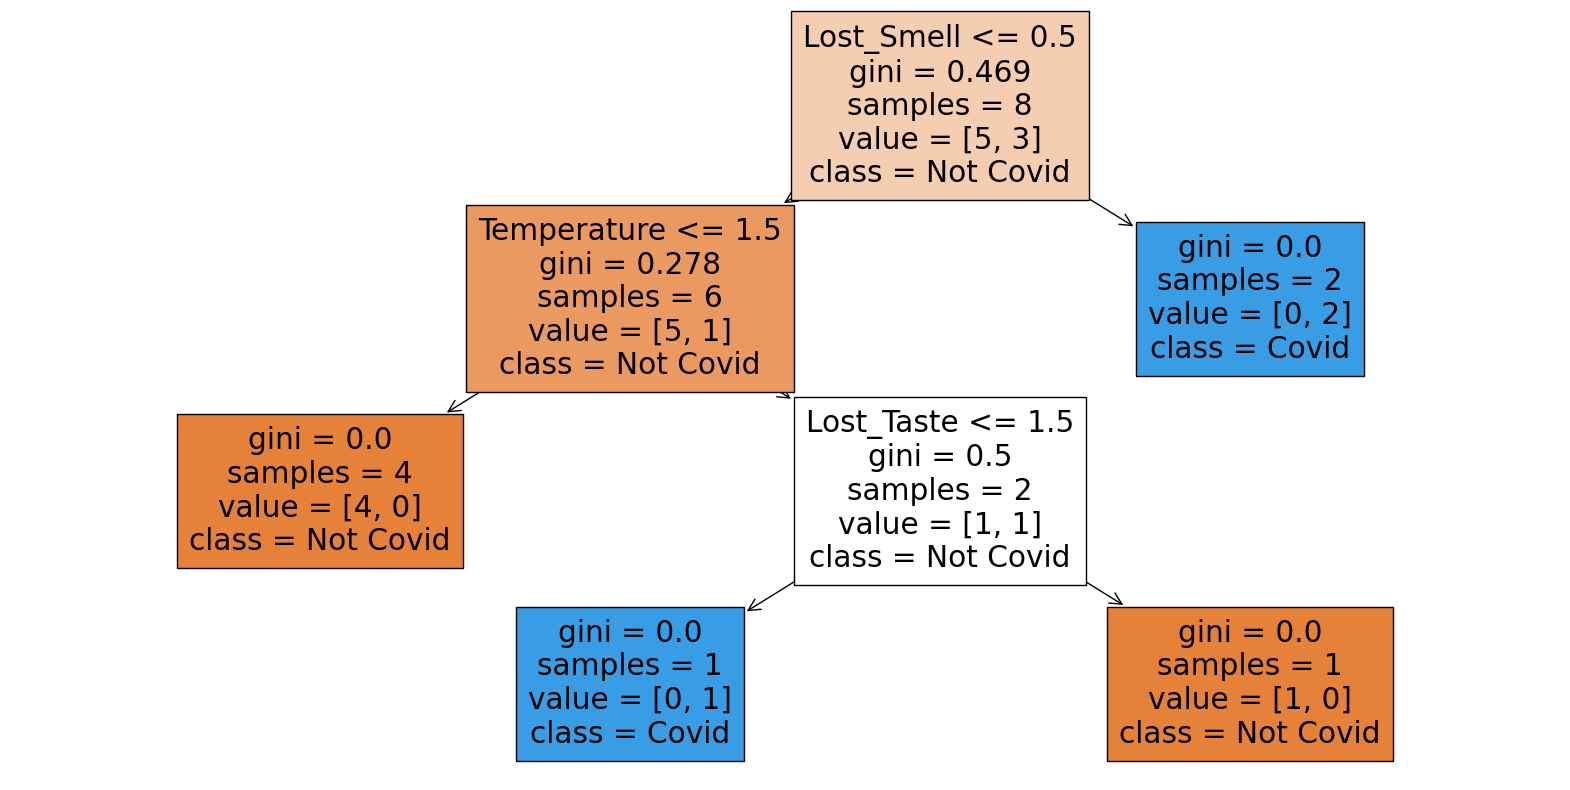

In [ ]:
DecTree(X_train, X_test, y_train, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/loc

The best parameters are:  {'criterion': 'gini', 'max_leaf_nodes': 3}
The best score associeted with the best parameters are:  0.7
[[2]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Training accuracy: 0.875
Test accuracy: 1.0


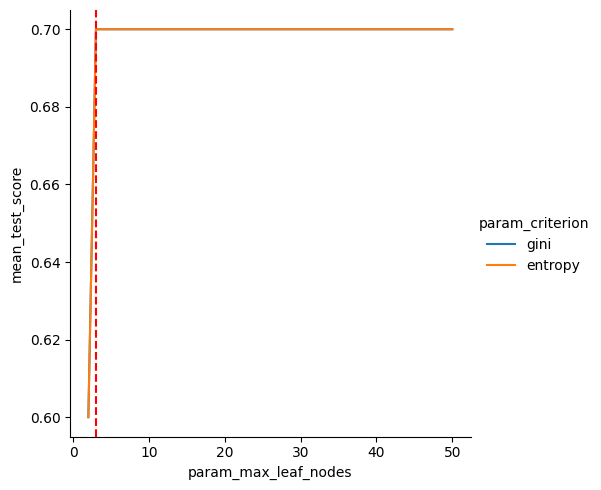

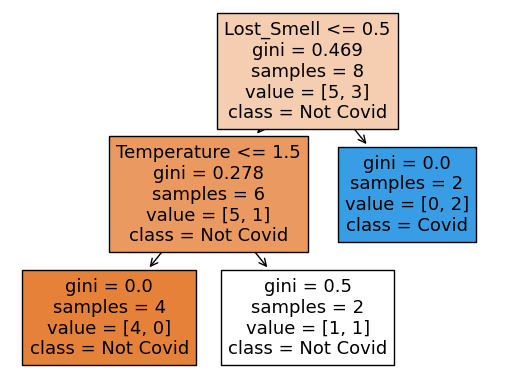

In [ ]:
DecTreeHyp(X_train, X_test, y_train, y_test)

# **References:**

[1] Scikit learn: https://scikit-learn.org/stable/supervised_learning.html

[2] Stackoverflow: https://stackoverflow.com/

[3] Kaggle: https://www.kaggle.com/

[4] Lecture Notes: https://study.dbs.ie/2122/msc-data/B9DA109/u1/index.html#/lessons/9fmrZ-qg71_3OaWCja5sPXXw1Skaa2kJ

https://study.dbs.ie/2122/msc-data/B9DA109/u1/index.html#/ https://study.dbs.ie/2122/msc-data/B9DA109/u2/index.html#/lessons/581oVBQjVCpps7kTvW9zYulimrk1SOdz

[5] Analytics Vidhya: https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/